# Entropy Plots

In [377]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [378]:
data_dir = "../../../results/overlap/"
sw_ent_dict_list_4  = pickle.load(open(data_dir + "sw_ent_dict_list_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(4, 'sca', 2), "rb" ) )
sw_ent_dict_list_6  = pickle.load(open(data_dir + "sw_ent_dict_list_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(6, 'sca', 2), "rb" ) )
sw_ent_dict_list_8  = pickle.load(open(data_dir + "sw_ent_dict_list_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(8, 'sca', 2), "rb" ) )
sw_ent_dict_list_10 = pickle.load(open(data_dir + "sw_ent_dict_list_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(10, 'sca', 2), "rb" ) )

In [379]:
def load_vars(dir_name, W_list, num_qubits, entanglement, reps):
    var_arr = [0]*len(W_list)
    for i, W in enumerate(W_list):
        fname="{}W{}_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(dir_name, W, num_qubits, entanglement, reps)
        with open(fname,'rb') as f:
            vqe_list = pickle.load(f)
            var_list = [vqe['Var'].real for vqe in vqe_list]
            var_arr[i] = var_list
    return np.array(var_arr)

In [380]:
dir_name ="../../../results/vvqe/" 
entanglement='sca'
reps=2

In [381]:
var_arr_4 = load_vars(dir_name, W_list_4, 4, entanglement, reps)
var_arr_6 = load_vars(dir_name, W_list_6, 6, entanglement, reps)
var_arr_8 = load_vars(dir_name, W_list_8, 8, entanglement, reps)
var_arr_10 = load_vars(dir_name, W_list_10, 10, entanglement, reps)

In [382]:
def get_avg_entropies(sw_ent_dict_list, var_arr=[], var_thresh=99999):
    num_la = len(sw_ent_dict_list)
    num_W  = len(sw_ent_dict_list[0].keys())
    
    W_list = list(sw_ent_dict_list[0].keys())
    la_list = np.arange(num_la) + 1
    
    ent_arr = np.zeros((num_W, num_la))
    for la_idx in range(num_la):
        for W_idx, W in enumerate(W_list):
            N = len(sw_ent_dict_list[la_idx][W])
            if len(var_arr) == 0:
                ent_arr[W_idx][la_idx] = np.median(sw_ent_dict_list[la_idx][W])
            else:
                l = [sw_ent_dict_list[la_idx][W][i] for i, v in enumerate(var_arr[W_idx]) if v < var_thresh]
                ent_arr[W_idx][la_idx] = np.median(l)

    return W_list, la_list, ent_arr

In [383]:
W_list_4, la_list_4, ent_arr_4 = get_avg_entropies(sw_ent_dict_list_4, var_arr_4)
W_list_6, la_list_6, ent_arr_6 = get_avg_entropies(sw_ent_dict_list_6)#, var_arr_6)
W_list_8, la_list_8, ent_arr_8 = get_avg_entropies(sw_ent_dict_list_8, var_arr_8, var_thresh=0.03)
W_list_10, la_list_10, ent_arr_10 = get_avg_entropies(sw_ent_dict_list_10, var_arr_10, var_thresh=0.03)

<IPython.core.display.Javascript object>


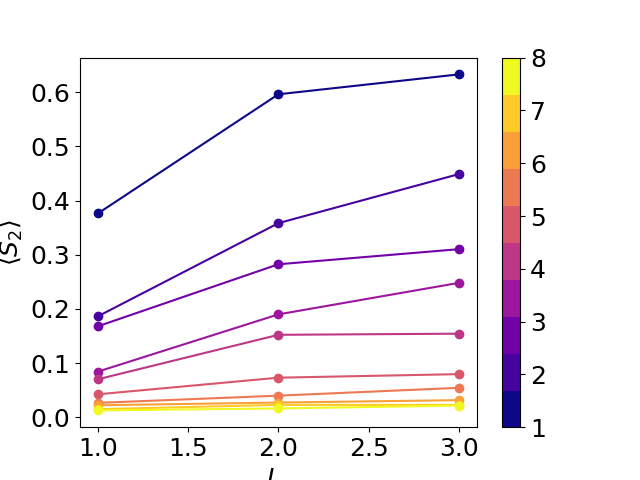

In [384]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
cmap = plt.get_cmap("plasma",len(W_list_6))
for W_idx, W in enumerate(W_list_6):
    plt.plot(la_list_6, ent_arr_6[W_idx,:], 'o-', label="W = {}".format(W),color= cmap(W_idx))
plt.xlabel(r"$L_{a}$")
plt.ylabel(r"$\left<S_{2}\right>$")
#plt.legend(loc='best')
norm = plt.Normalize(1,8)
sm = plt.cm.ScalarMappable(norm=norm,cmap=cmap)
sm.set_array(W_list_6)
plt.colorbar(sm, ticks=range(1,9))
plt.show()

<IPython.core.display.Javascript object>


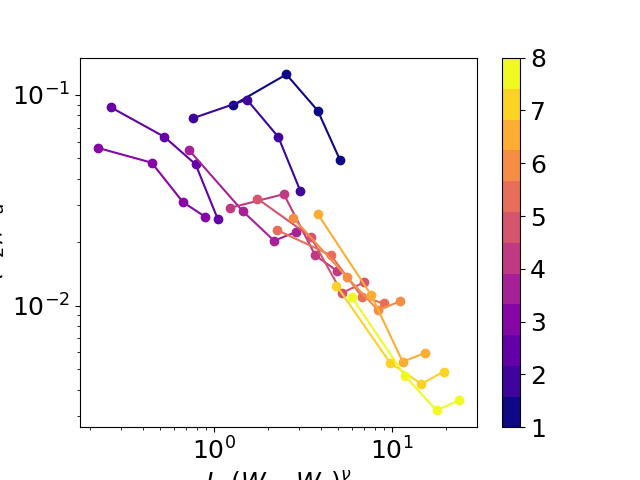

In [385]:
%matplotlib notebook
nu= 1.02; hc = 2.27 #eta= 0.8
#nu = 0.80; hc = 3.62 #eta=0.5
matplotlib.rcParams.update({'font.size': 18})
cmap = plt.get_cmap("plasma",len(W_list_8))
for W_idx, W in enumerate(W_list_8):
    plt.loglog(la_list_8*np.abs(W-hc)**nu, ent_arr_8[W_idx,:]/la_list_8, 'o-', label="W = {}".format(W),color= cmap(W_idx))
plt.xlabel(r"$L_{a}(W - W_{c})^{\nu}$")
plt.ylabel(r"$\left<S_{2}\right>/L_{a}$")
#plt.legend(loc='best')
norm = plt.Normalize(1,8)
sm = plt.cm.ScalarMappable(norm=norm,cmap=cmap)
sm.set_array(W_list_6)
plt.colorbar(sm, ticks=range(1,9))
plt.show()

<IPython.core.display.Javascript object>


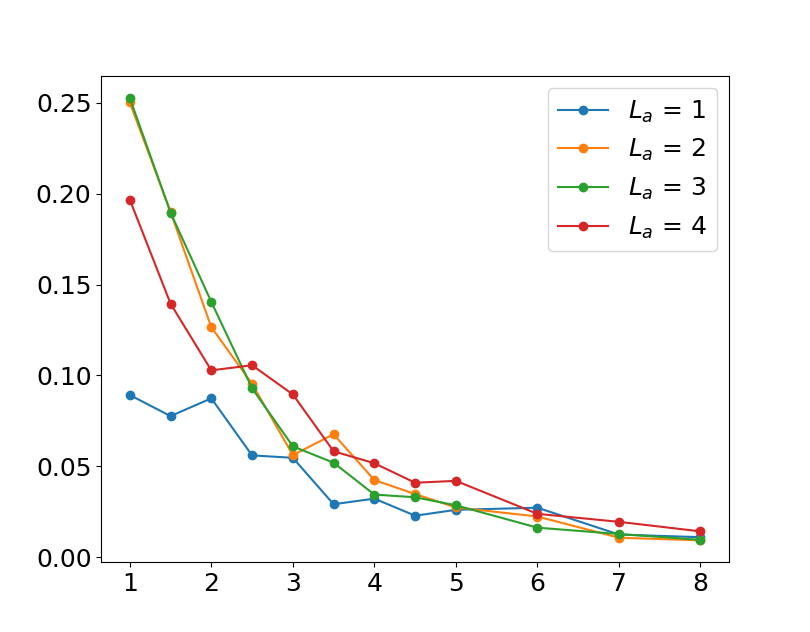

In [386]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for la_idx, la in enumerate(la_list):
    plt.plot(W_list_8, ent_arr_8[:,la_idx], 'o-', label="{} = {}".format(r'$L_{a}$',la))
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


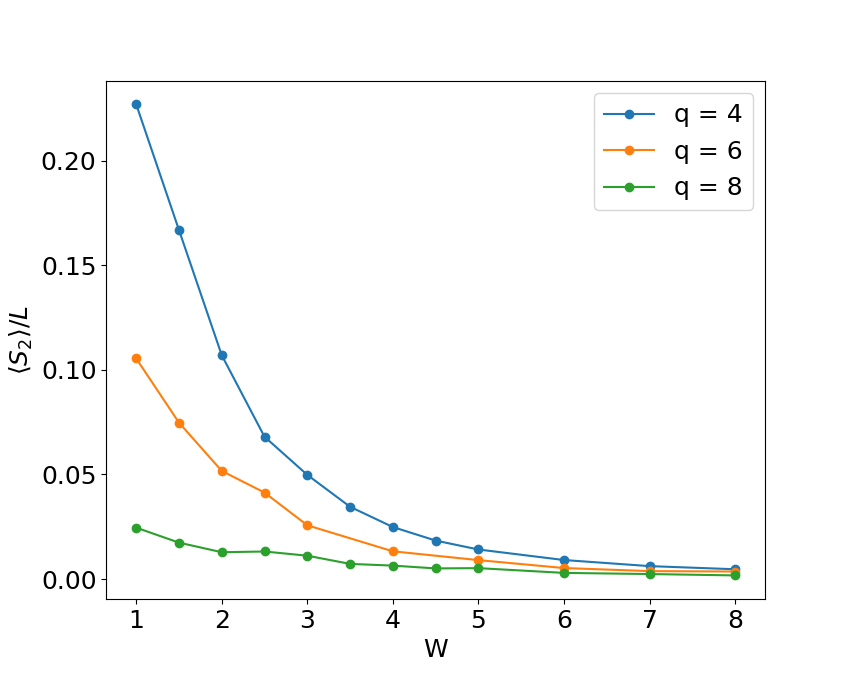

In [387]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})

plt.plot(W_list_4, ent_arr_4[:,-1]/4, 'o-', label="q = 4")
plt.plot(W_list_6, ent_arr_6[:,-1]/6, 'o-', label="q = 6")
plt.plot(W_list_8, ent_arr_8[:,-1]/8, 'o-', label="q = 8")
#plt.plot(W_list_10, ent_arr_10[:,-1], 'o-', label="q = 10")
plt.legend(loc='best')
plt.xlabel("W")
plt.ylabel(r"$\left<S_{2}\right>/L$")
plt.show()


<IPython.core.display.Javascript object>


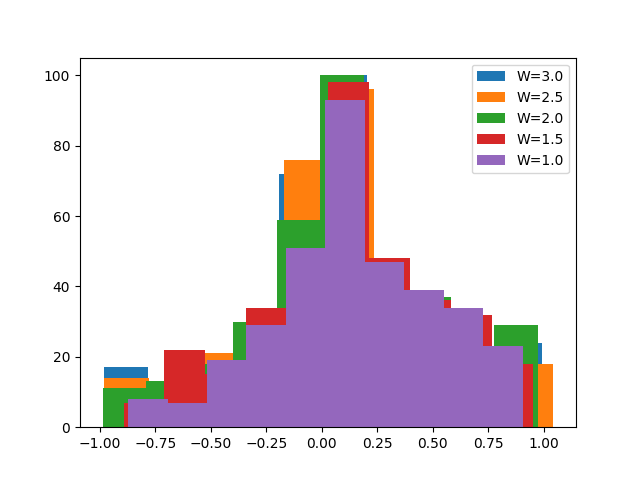

In [351]:
%matplotlib notebook
for W in np.flip(W_list_6)[5:]:
    s2_1 = np.array(sw_ent_dict_list_6[0][W])
    s2_2 = np.array(sw_ent_dict_list_6[1][W])
    diff = s2_2 - s2_1
    plt.hist(diff, label='W={}'.format(W))
plt.legend(loc='best')
plt.show()

In [388]:
print(W_list_8)

[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8]
